✅ Dataset loaded from: /content/Mall_Customers.csv

Columns in dataset: ['CustomerID', 'Genre', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']

First 5 rows:


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40



Using features -> X: 'Annual Income (k$)' and Y: 'Spending Score (1-100)'

Missing values in the two columns:
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Rows used for clustering: 200


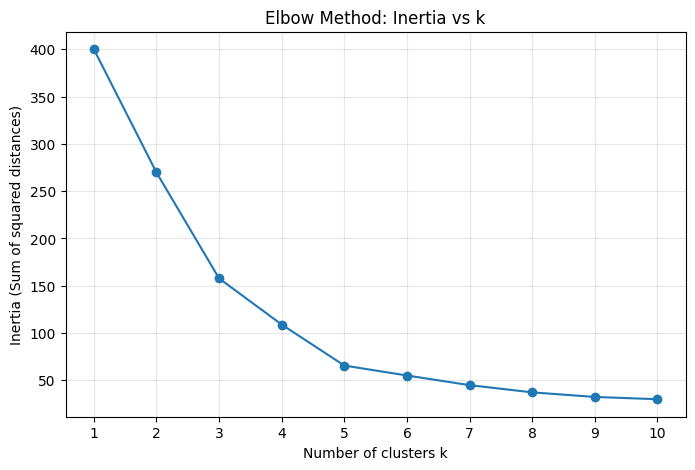


Silhouette scores (k = 2..10):
  k=2 -> silhouette = 0.3213
  k=3 -> silhouette = 0.4666
  k=4 -> silhouette = 0.4939
  k=5 -> silhouette = 0.5547
  k=6 -> silhouette = 0.5399
  k=7 -> silhouette = 0.5281
  k=8 -> silhouette = 0.4552
  k=9 -> silhouette = 0.4571
  k=10 -> silhouette = 0.4432

Silhouette suggests best k = 5 (score=0.5547)

Using final_k = 5 (change this variable if you want a different number)

Cluster counts:
Cluster
0    81
1    39
2    22
3    35
4    23
Name: count, dtype: int64

Saved clustered output to 'kmeans_clustered_output.csv' in Colab working directory (/content).


/tmp/ipython-input-3527938642.py:115: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('tab10')


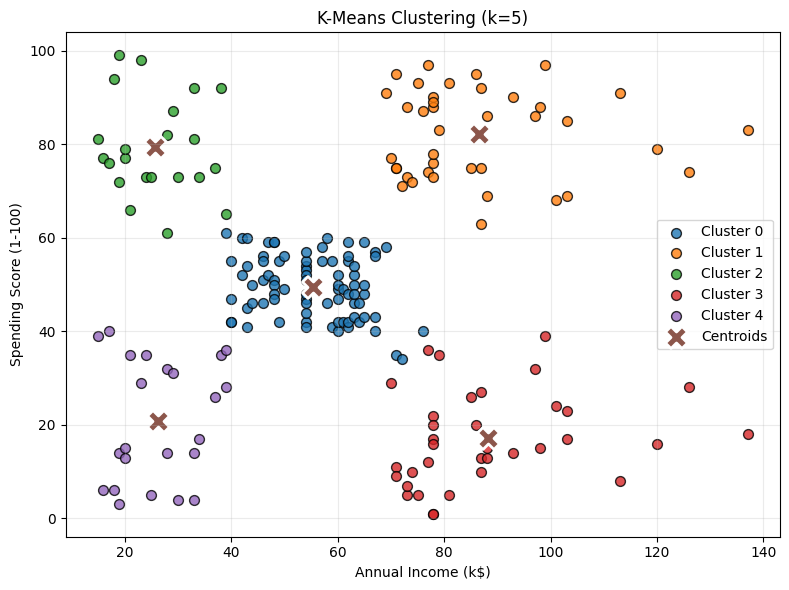


Cluster profiles (mean & count):


Annual Income (k$)       Spending Score (1-100)      
                      mean count                   mean count
Cluster                                                      
0                    55.30    81                  49.52    81
1                    86.54    39                  82.13    39
2                    25.73    22                  79.36    22
3                    88.20    35                  17.11    35
4                    26.30    23                  20.91    23


Quick human-readable insights (automatically generated):
 - Cluster 0: Low income, Low spending — size=81, mean Annual Income (k$)=55.3, mean Spending Score (1-100)=49.52
 - Cluster 1: High income, High spending — size=39, mean Annual Income (k$)=86.54, mean Spending Score (1-100)=82.13
 - Cluster 2: Low income, High spending — size=22, mean Annual Income (k$)=25.73, mean Spending Score (1-100)=79.36
 - Cluster 3: High income, Low spending — size=35, mean Annual Income (k$)=88.2, mean Spending Score (1-100)=17.11
 - Cluster 4: Low income, Low spending — size=23, mean Annual Income (k$)=26.3, mean Spending Score (1-100)=20.91

Sample of data with cluster labels:


,Annual Income (k$),Spending Score (1-100),Cluster
0,15,39,4
1,15,81,2
2,16,6,4
3,16,77,2
4,17,40,4
5,17,76,2
6,18,6,4
7,18,94,2
8,19,3,4
9,19,72,2


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


Direct tips:
- Use the elbow plot to choose K visually: look for the 'elbow' where inertia reduction flattens.
- Use silhouette scores as numeric backup; higher is better (closer to +1).
- If your instructor expects exactly 5 clusters, set final_k = 5 (already set).
- For report: paste elbow plot, silhouette table, final cluster scatter with centroids, and the short insights above.


In [1]:
# Ex No:13 - K-Means clustering on Mall_Customers.csv (Colab-ready)
# Paste this whole block into a Colab cell, set csv_path to your uploaded file path, and run.

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from matplotlib import cm

# ------------------ USER: set path copied from Colab files panel ------------------
csv_path = '/content/Mall_Customers.csv'   # <-- change if your copied path is different
# ----------------------------------------------------------------------------------

if not os.path.exists(csv_path):
    raise FileNotFoundError(f"CSV not found at {csv_path}. Copy path from Colab Files panel and set csv_path accordingly.")

# 1) LOAD & PREVIEW
df = pd.read_csv(csv_path)
print("✅ Dataset loaded from:", csv_path)
print("\nColumns in dataset:", list(df.columns))
print("\nFirst 5 rows:")
display(df.head())

# Robust feature selection: find Annual Income and Spending Score columns
income_candidates = [c for c in df.columns if 'income' in c.lower()]
spend_candidates = [c for c in df.columns if ('spend' in c.lower() or 'score' in c.lower())]

if income_candidates and spend_candidates:
    income_col = income_candidates[0]
    spend_col = spend_candidates[0]
else:
    numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    if len(numeric_cols) >= 2:
        income_col, spend_col = numeric_cols[0], numeric_cols[1]
    else:
        raise ValueError("Could not detect suitable columns. Ensure CSV has 'Annual Income' and 'Spending Score' numeric columns.")

print(f"\nUsing features -> X: '{income_col}' and Y: '{spend_col}'")

# Extract X matrix and clean
X_raw = df[[income_col, spend_col]].copy()
print("\nMissing values in the two columns:")
print(X_raw.isnull().sum())

# Drop rows with NaNs in these features (safe for this exercise)
X_raw = X_raw.dropna().reset_index(drop=True)
print(f"\nRows used for clustering: {len(X_raw)}")

# Optional scaling: KMeans benefits from scaling when features differ; we standardize but keep originals for plotting
scaler = StandardScaler()
X = scaler.fit_transform(X_raw.values)   # scaled data used for KMeans
X_orig = X_raw.values                    # original scale for plots & centroid inverse transform

# ------------------ 2) Elbow Method (SSE / inertia) ------------------
inertia = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K_range, inertia, marker='o')
plt.xticks(K_range)
plt.xlabel('Number of clusters k')
plt.ylabel('Inertia (Sum of squared distances)')
plt.title('Elbow Method: Inertia vs k')
plt.grid(alpha=0.3)
plt.show()

# Also give silhouette scores for 2..10 as numeric guidance
sil_scores = {}
print("\nSilhouette scores (k = 2..10):")
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    sil_scores[k] = score
    print(f"  k={k} -> silhouette = {score:.4f}")

best_sil_k = max(sil_scores, key=sil_scores.get)
print(f"\nSilhouette suggests best k = {best_sil_k} (score={sil_scores[best_sil_k]:.4f})")

# ------------------ 3) Apply KMeans ------------------
# Default: set final_k to the k your instructor expects (often 5) or use silhouette suggestion.
final_k = 5   # <-- change this to best_sil_k if you want automatic pick: final_k = best_sil_k
print(f"\nUsing final_k = {final_k} (change this variable if you want a different number)")

kmeans_final = KMeans(n_clusters=final_k, random_state=42, n_init=20)
labels_final = kmeans_final.fit_predict(X)

# Centroids: in scaled space and inverse-transformed to original scale for interpretation/plotting
centroids_scaled = kmeans_final.cluster_centers_
centroids_orig = scaler.inverse_transform(centroids_scaled)

# Attach labels and save
df_result = X_raw.copy()
df_result['Cluster'] = labels_final
df_result = df_result.reset_index(drop=True)
print("\nCluster counts:")
print(df_result['Cluster'].value_counts().sort_index())

# Save CSV with cluster assignments
out_csv = 'kmeans_clustered_output.csv'
df_result.to_csv(out_csv, index=False)
print(f"\nSaved clustered output to '{out_csv}' in Colab working directory (/content).")

# ------------------ 4) Plot clusters + centroids ------------------
plt.figure(figsize=(8,6))
unique_labels = np.unique(labels_final)
# Use a colormap to select distinct colors
cmap = cm.get_cmap('tab10')
for lab in unique_labels:
    mask = labels_final == lab
    plt.scatter(X_orig[mask, 0], X_orig[mask, 1], s=50, alpha=0.8, label=f'Cluster {lab}', edgecolors='k')
# plot centroids
plt.scatter(centroids_orig[:, 0], centroids_orig[:, 1], s=250, marker='X', linewidths=2,
            edgecolors='white', label='Centroids')
plt.xlabel(income_col)
plt.ylabel(spend_col)
plt.title(f'K-Means Clustering (k={final_k})')
plt.legend()
plt.grid(alpha=0.25)
plt.tight_layout()
plt.show()

# ------------------ 5) Cluster profiles and insights ------------------
profile = df_result.groupby('Cluster')[[income_col, spend_col]].agg(['mean','count']).round(2)
print("\nCluster profiles (mean & count):")
display(profile)

# Quick textual insight generation: compare each cluster mean to global mean and give label
global_income_mean = X_orig[:,0].mean()
global_spend_mean = X_orig[:,1].mean()

insights = []
print("\nQuick human-readable insights (automatically generated):")
for lab in unique_labels:
    cluster_mean_income = profile.loc[lab, (income_col, 'mean')]
    cluster_mean_spend = profile.loc[lab, (spend_col, 'mean')]
    size = int(profile.loc[lab, (income_col, 'count')])
    # determine high/low relative to global mean
    income_tag = "High income" if cluster_mean_income > global_income_mean else "Low income"
    spend_tag = "High spending" if cluster_mean_spend > global_spend_mean else "Low spending"
    desc = f"Cluster {lab}: {income_tag}, {spend_tag} — size={size}, mean {income_col}={cluster_mean_income}, mean {spend_col}={cluster_mean_spend}"
    insights.append(desc)
    print(" -", desc)

# ------------------ 6) Optional: show cluster assignment sample and trigger download ------------------
print("\nSample of data with cluster labels:")
display(df_result.head(10))

# Attempt automatic download (may or may not be allowed depending on Colab)
try:
    from google.colab import files
    files.download(out_csv)
except Exception:
    print("Automatic download failed or blocked — use the Colab Files panel to download the CSV manually.")

# ------------------ Direct tips (no fluff) ------------------
print("\nDirect tips:")
print("- Use the elbow plot to choose K visually: look for the 'elbow' where inertia reduction flattens.")
print("- Use silhouette scores as numeric backup; higher is better (closer to +1).")
print("- If your instructor expects exactly 5 clusters, set final_k = 5 (already set).")
print("- For report: paste elbow plot, silhouette table, final cluster scatter with centroids, and the short insights above.")
